# Diabetes Dataset EDA

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

### Import Data

In [14]:
diabetes_binary_dataset = pd.read_csv("../data/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')
diabetes_012_dataset = pd.read_csv("../data/diabetes_012_health_indicators_BRFSS2015.csv")


### Dataset Description

In [16]:
# Three-class diabetes dataset
diabetes_012_dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In this dataset, there are 22 columns in total: 7 numeric columns, 14 binary columns (dummy), and the dependent column of interest (Diabetes_012). <br/><br/>

'Diabetes_012':  indicates that 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. <br/>
'HighBP': indicates that 0 is for low blood pressure, 1 is for high blood pressure <br/>
'HighChol': indicates that 0 is for low cholesterol level, 1 is for high cholesterol level <br/>
'CholCheck': indicates that 0 is for no cholesterol check within 5 years, 1 is for cholesterol check within 5 years <br/>
'BMI': Body mass index level <br/>
'Smoker': indicates that 0 is for never had more than 100 cigarettes, 1 is for had more than 100 cigarettes <br/>
'Stroke': indicates that 0 is for never had a stroke, 1 is for had a stroke <br/>
'HeartDiseaseorAttack': indicates that 0 is for not having coronary heart disease, 1 is for having coronary heart disease<br/>
'PhysActivity': indicates that 0 is for no physical activity in last 30 days, 1 is for had done physical activity in last 30 days <br/>
'Fruits': indicates that 0 is not consuming at least 1 fruit/day, 1 is for consuming at least 1 fruit/day<br/>
'Veggies': indicates that 0 is for not consuming at least 1 veggies/day, 1 is for consuming at least 1 veggies/day<br/>
'HvyAlcoholConsump': Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) indicates that 0 is for no, 1 is yes <br/>
'AnyHealthcare': indicates that 0 is for no healthcare coverage, 1 is for having health care coverage <br/>
'NoDocbcCost': indicates that 0 is for affording a doctor appointment cause of cost within the last year, 1 is for not being able to afford a doctor appointment cause of cost within the last year<br/>
'GenHlth': personal rating indicates general health scale: scale 1-5 (1 = excellent 2 = very good 3 = good 4 = fair 5 = poor) <br/>
'MentHlth': indicates days thinking about mental health <br/>
'PhysHlth': indicates days thinking about physical health <br/>
'DiffWalk': indicates that 0 is for no difficulty walking down stairs, 1 is for difficulty walking down stairs <br/>
'Sex': indicates that 0 is for female, 1 is for male <br/>
'Age': indicates age in years <br/>
'Education': indicates Education level (EDUCA see codebook) scale 1-6 (1 = Never attended school or only kindergarten; 2 = Grades 1 through 8) <br/>
'Income': indicates Income scale (INCOME2 see codebook) scale 1-8 (1 = less than 10,000; 5 = less than 35,000; 8 = $75,000 or more) <br/>

In [17]:
# Binary diabetes dataset
diabetes_binary_dataset

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In this dataset, column Diabetes_binary indicates that 0 is for no diabetes and 1 is for diabetes. </br> The columns are the same as the previous dataset.

### Exploration #1: diabetes_binary dataset

#### Dataset Overview

In [3]:
# Overview of features
diabetes_binary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# More overview of features
diabetes_binary_dataset.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


#### Data Cleaning

In [5]:
# Check missing values
diabetes_binary_dataset.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
# Check duplicates
diabetes_binary_dataset.duplicated().sum()

24206

In [7]:
# Remove duplicates
diabetes_binary_dataset.drop_duplicates(inplace = True)

#### Explore Column: Diabetes_binary

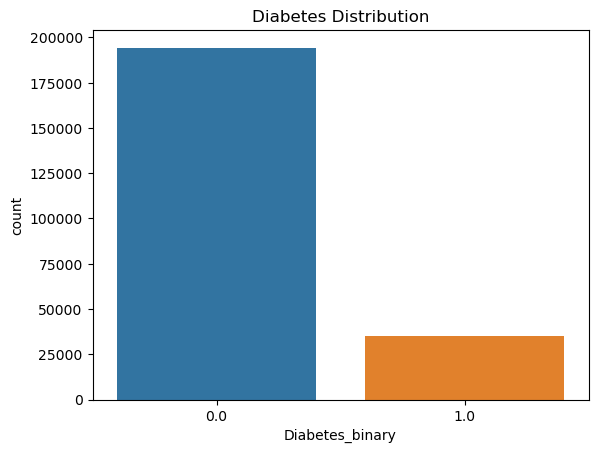

In [8]:
# Barplot to show proportion of people with Diabetes vs. without Diabetes
sns.countplot(data = diabetes_binary_dataset, x = 'Diabetes_binary')
plt.title("Diabetes Distribution")
plt.show()

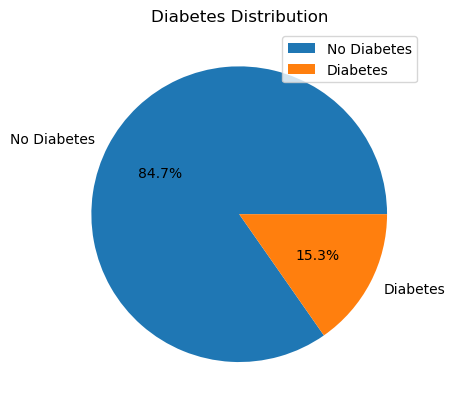

In [13]:
# Pieplot to show proportion of people with Diabetes vs. without Diabetes
grouped_data = diabetes_binary_dataset.groupby('Diabetes_binary').size().reset_index(name='count')
plt.pie(grouped_data['count'], labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
plt.legend()
plt.title("Diabetes Distribution")
plt.show()

#### Explore correlations between variables

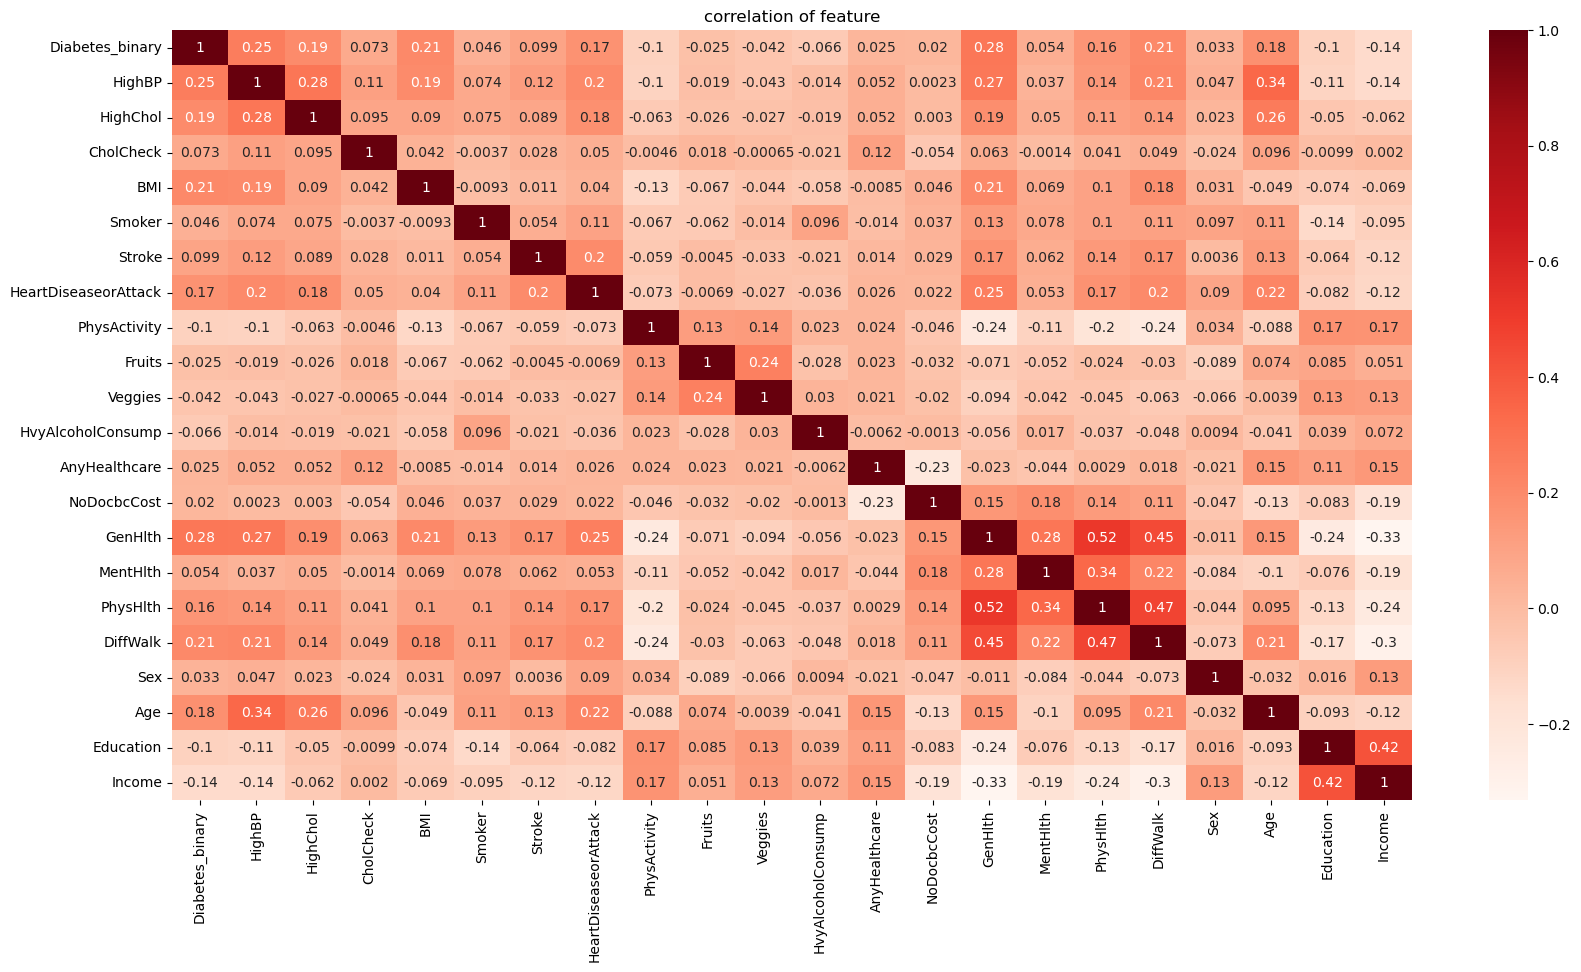

In [10]:
# Colormap to show the pairwise correlation between features
plt.figure(figsize = (20,10))
sns.heatmap(diabetes_binary_dataset.corr(),annot=True , cmap ='Reds')
plt.title("correlation of feature")
plt.show()

GenHlth seems to be the feature that has the highest correlation coefficient with Diabetes_binary, so let's further investigate the relationship between them.

#### Explore the Distribution of Diabetes with respect to GenHlth

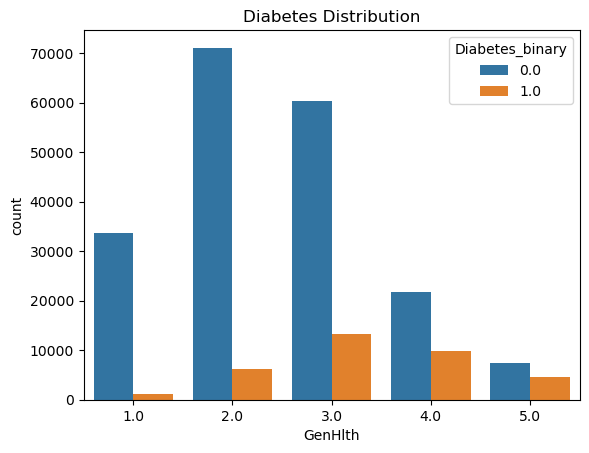

In [11]:
# Barplot to show proportion of people with Diabetes vs. without Diabetes with respect to GenHlth
sns.countplot(data = diabetes_binary_dataset, x = 'GenHlth', hue = 'Diabetes_binary')
plt.title("Diabetes Distribution")
plt.show()

This visualization clearly shows that Diebetes happens more often when people's general health condition is worse.

### Exploration #2: diabetes_012_dataset